<a href="https://colab.research.google.com/github/Kitagawa-Mariin/HenryPark_Python/blob/Python_Learning/SP24_Python_Learning_Project_2_Analysis_of_biosignals_that_indicates_heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
from matplotlib.pyplot import figure

drive.mount('/content/drive/')




Mounted at /content/drive/


In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/Python_Learning/heart_disease.csv"
df = pd.read_csv(path)
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [ ]:
df.info()
#sex             1 = male, 0= female
#Chest Pain Type -- Value 1: typical angina
#                -- Value 2: atypical angina
#                -- Value 3: non-anginal pain
#                -- Value 4: asymptomatic
#Fasting Blood sugar(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#higher than 120 indicates diabetes
#Resting electrocardiogram results -- Value 0: normal
#(testing heart beat rate)         -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#                                  -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
#Exercise induced angina.          1 = yes; 0 = no
#the slope of the peak exercise ST segment.  -- Value 1: upsloping
#                                            -- Value 2: flat
#                                            -- Value 3: downsloping
#class              1 = heart disease, 0 = Normal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


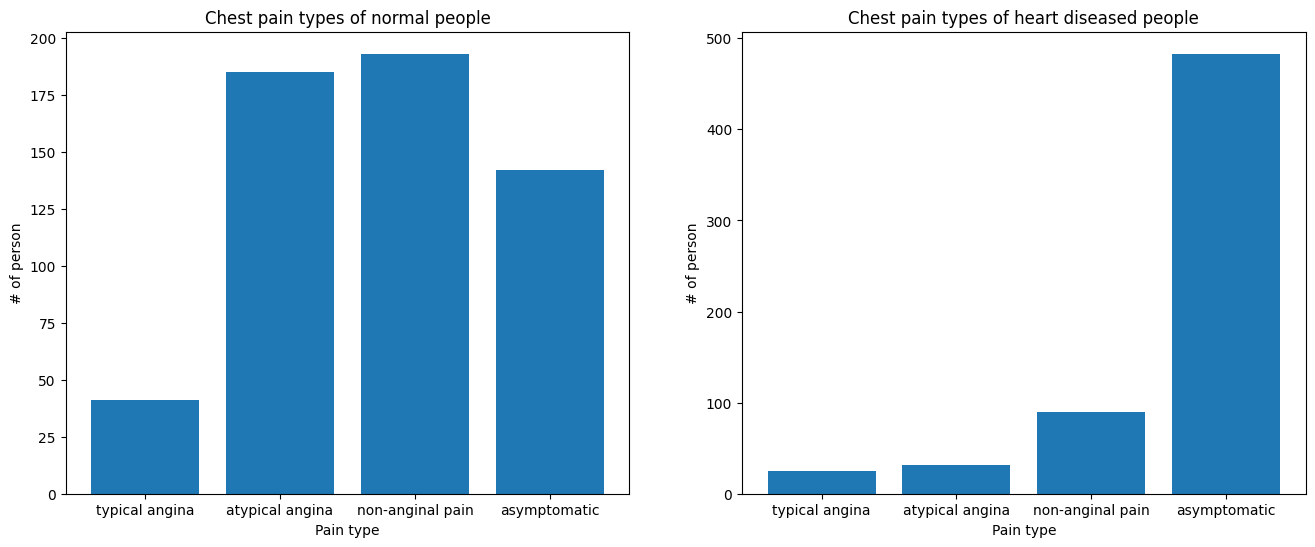

In [ ]:
#a20 = df[(df['age'] > 20) & (df['age'] <= 30)]
#a30 = df[(df['age'] > 30) & (df['age'] <= 40)]
#a40 = df[(df['age'] > 40) & (df['age'] <= 50)]
#a50 = df[(df['age'] > 50) & (df['age'] <= 60)]
#a60 = df[(df['age'] > 60) & (df['age'] <= 70)]
#a70 = df[(df['age'] > 70) & (df['age'] <= 80)]
domain = ['typical angina','atypical angina','non-anginal pain','asymptomatic']
figure(num=None, figsize=(16, 6))
#chest pain type of normal people
h01 = len(df[(df['target'] == 0) & (df['chest pain type'] == 1)])
h02 = len(df[(df['target'] == 0) & (df['chest pain type'] == 2)])
h03 = len(df[(df['target'] == 0) & (df['chest pain type'] == 3)])
h04 = len(df[(df['target'] == 0) & (df['chest pain type'] == 4)])
h_t0 = [h01,h02,h03,h04]

#chest pain type of heart diseased people
h11 = len(df[(df['target'] == 1) & (df['chest pain type'] == 1)])
h12 = len(df[(df['target'] == 1) & (df['chest pain type'] == 2)])
h13 = len(df[(df['target'] == 1) & (df['chest pain type'] == 3)])
h14 = len(df[(df['target'] == 1) & (df['chest pain type'] == 4)])
h_t1 = [h11,h12,h13,h14]


plt.subplot(1,2,1)
plt.bar(domain,h_t0)
plt.xlabel('Pain type')
plt.ylabel('# of person')
plt.title('Chest pain types of normal people')
plt.subplot(1,2,2)
plt.bar(domain,h_t1)
plt.title('Chest pain types of heart diseased people')
plt.xlabel('Pain type')
plt.ylabel('# of person')

plt.show()
#no relationship chest pain =/= heart disease

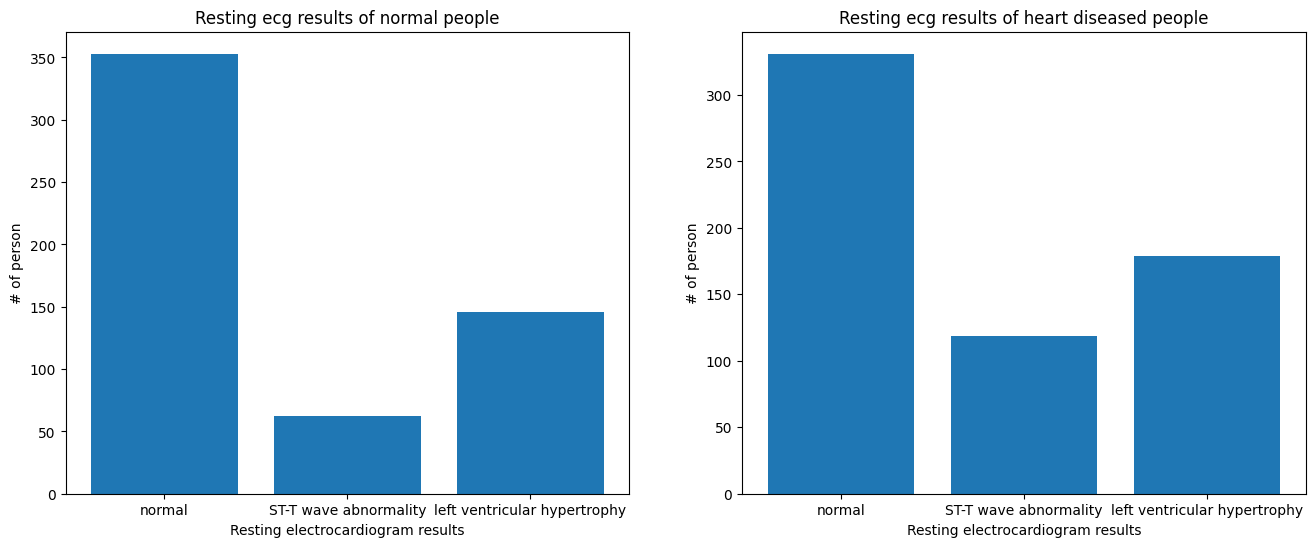

In [ ]:
domain = ['normal','ST-T wave abnormality','left ventricular hypertrophy']
figure(num=None, figsize=(16, 6))
#chest pain type of normal people
ecg01 = len(df[(df['target'] == 0) & (df['resting ecg'] == 0)])
ecg02 = len(df[(df['target'] == 0) & (df['resting ecg'] == 1)])
ecg03 = len(df[(df['target'] == 0) & (df['resting ecg'] == 2)])

ecg_t0 = [ecg01,ecg02,ecg03]

#chest pain type of heart diseased people
ecg11 = len(df[(df['target'] == 1) & (df['resting ecg'] == 0)])
ecg12 = len(df[(df['target'] == 1) & (df['resting ecg'] == 1)])
ecg13 = len(df[(df['target'] == 1) & (df['resting ecg'] == 2)])
ecg_t1 = [ecg11,ecg12,ecg13]


plt.subplot(1,2,1)
plt.bar(domain,ecg_t0)
plt.xlabel('Resting electrocardiogram results')
plt.ylabel('# of person')
plt.title('Resting ecg results of normal people')
plt.subplot(1,2,2)
plt.bar(domain,ecg_t1)
plt.title('Resting ecg results of heart diseased people')
plt.xlabel('Resting electrocardiogram results')
plt.ylabel('# of person')

plt.show()
#Both normal persons and heart diseased persons have normal resting ecg results

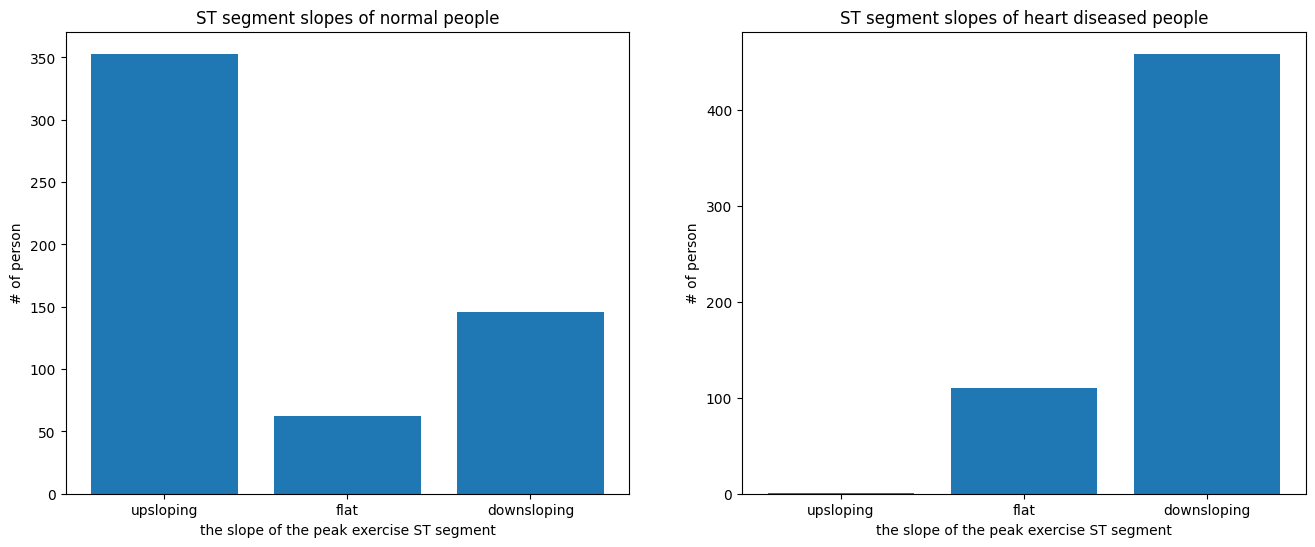

In [ ]:
domain = ['upsloping','flat','downsloping']
figure(num=None, figsize=(16, 6))
#chest pain type of normal people
st01 = len(df[(df['target'] == 0) & (df['ST slope'] == 0)])
st02 = len(df[(df['target'] == 0) & (df['ST slope'] == 1)])
st03 = len(df[(df['target'] == 0) & (df['ST slope'] == 2)])
st_t0 = [ecg01,ecg02,ecg03]

#chest pain type of heart diseased people
st11 = len(df[(df['target'] == 1) & (df['ST slope'] == 0)])
st12 = len(df[(df['target'] == 1) & (df['ST slope'] == 1)])
st13 = len(df[(df['target'] == 1) & (df['ST slope'] == 2)])
st_t1 = [st11,st12,st13]


plt.subplot(1,2,1)
plt.bar(domain,st_t0)
plt.xlabel('the slope of the peak exercise ST segment')
plt.ylabel('# of person')
plt.title('ST segment slopes of normal people')
plt.subplot(1,2,2)
plt.bar(domain,st_t1)
plt.title('ST segment slopes of heart diseased people')
plt.xlabel('the slope of the peak exercise ST segment')
plt.ylabel('# of person')

plt.show()
#downsloping --> heart disease
#upsloping --> normal heart
#downsloping peak exercise ST segment indicates heart disease

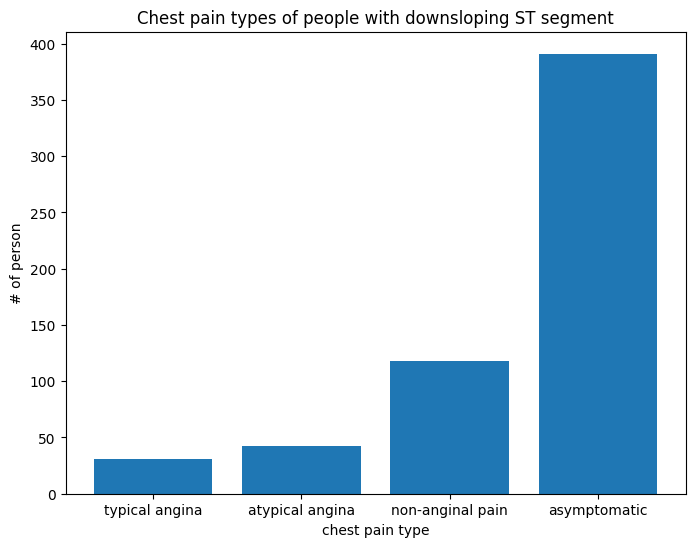

In [ ]:
domain = ['typical angina','atypical angina','non-anginal pain','asymptomatic']
figure(num=None, figsize=(8, 6))
#chest pain type of ST slope downsloping
cpt21 = len(df[(df['ST slope'] == 2) & (df['chest pain type'] == 1)])
cpt22 = len(df[(df['ST slope'] == 2) & (df['chest pain type'] == 2)])
cpt23 = len(df[(df['ST slope'] == 2) & (df['chest pain type'] == 3)])
cpt24 = len(df[(df['ST slope'] == 2) & (df['chest pain type'] == 4)])

cpt_s2 = [cpt21,cpt22,cpt23,cpt24]

plt.bar(domain,cpt_s2)
plt.xlabel('chest pain type')
plt.ylabel('# of person')
plt.title('Chest pain types of people with downsloping ST segment')

plt.show()
#no relationship between downsloping and chest pain

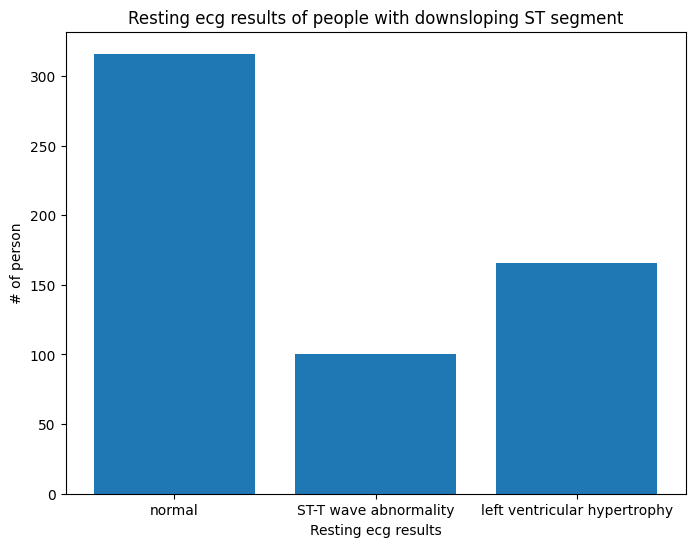

In [ ]:
domain = ['normal','ST-T wave abnormality','left ventricular hypertrophy']
figure(num=None, figsize=(8, 6))
#resting ecg results of ST slope downsloping
ecg21 = len(df[(df['ST slope'] == 2) & (df['resting ecg'] == 0)])
ecg22 = len(df[(df['ST slope'] == 2) & (df['resting ecg'] == 1)])
ecg23 = len(df[(df['ST slope'] == 2) & (df['resting ecg'] == 2)])

ecg_s2 = [ecg21,ecg22,ecg23]

plt.bar(domain,ecg_s2)
plt.xlabel('Resting ecg results')
plt.ylabel('# of person')
plt.title('Resting ecg results of people with downsloping ST segment')

plt.show()
#no relationship between downsloping and resting ecg results

The slope of the peak exercise ST segment is the best indicator of heart disease.\
Downsloping peak exercise ST segment indicates the high chances of heart disease.\
No relationships among chest pain, resting ecg results and heart disease are found.\
No relationships among chest pain, resting ecg results and downsloping peak exercise ST segment.